## MNIST Digit Recognition ##


Group members:
- Shahzeb Imtiaz
- Muhammad Shaheryar
- Waleed bin inq Satti
- Abdul hannan bin saeed
- Astri emelina Hernandez lanza
- Mauricio antonio Rodriguez moscoso


Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/digit-recognizer/train.csv")

In [3]:
df = pd.DataFrame(data)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X = df.drop(['label'], axis =1) 
X.shape

(42000, 784)

In [6]:
y = df[['label']]
y.shape

(42000, 1)

### Missing values ###

In [7]:
df.isna().sum() 

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### Applying KNN on dataset with PCA ###

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
X_train.shape

(31500, 784)

In [11]:
y_train.shape

(31500, 1)

### Pipeline ###

In [12]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('pca', PCA(n_components=100)), 
    ('knn_classifier', KNeighborsClassifier()) 
])

In [13]:
knn_pipe.fit(X_train, y_train)

/Users/shahzeb/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('knn_classifier', KNeighborsClassifier())])

In [14]:
import joblib
joblib.dump(knn_pipe, "../pipeline/base_model.joblib")

['../pipeline/base_model.joblib']

In [15]:
y_pred = knn_pipe.predict(X_test)

••• Accuracy •••

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9543809523809523

95.37  of Accuracy is obtained with traditional ML model

### Applying on Test dataset ###

In [17]:
data_test = pd.read_csv("../data/digit-recognizer/test.csv")

In [18]:
df_test = pd.DataFrame(data_test)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [20]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_hat = knn_pipe.predict(df_test)

In [30]:
y_hat


array([2, 0, 9, ..., 3, 9, 2])

### CNN model ###

In [31]:
X_train_1,  x_val, y_train_1, y_val =  train_test_split(X_train, y_train, test_size= 0.2, random_state= 42)

In [ ]:
X_train_1 = X_train_1.to_numpy() 
x_val = x_val.to_numpy()
X_test = X_test.to_numpy()


In [33]:
print(X_train_1.shape)
print(x_val.shape)
print(X_test.shape)

(25200, 784)
(6300, 784)
(10500, 784)


#### Resizing to required img size ###

In [34]:




X_train_1 = X_train_1.reshape(25200, 28, 28, 1)
x_val = x_val.reshape(6300, 28, 28, 1)
X_test = X_test.reshape(10500, 28, 28, 1)



In [35]:
y_train_1 = y_train_1.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

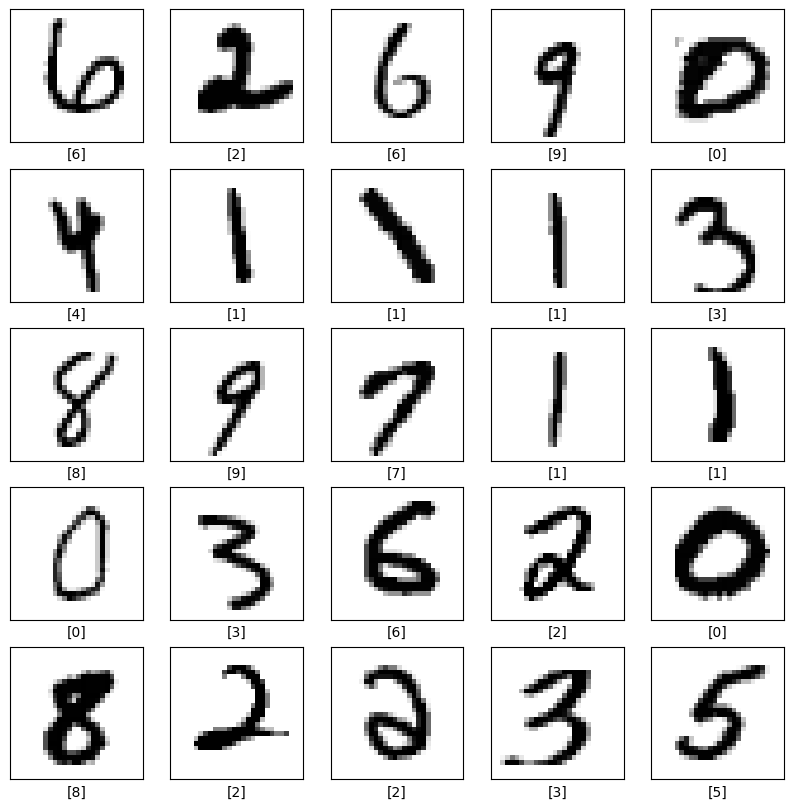

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_1[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_1[i])
plt.show()

Normalizing the pixel value betwwen 0 and 1

In [37]:
X_train_1 = X_train_1 / 255.0
x_val = x_val / 255.0
X_test = X_test / 255.0


In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten 


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))


model.add(Flatten())
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))


model.add(Dense(10, activation='softmax', name='Output'))

model.summary()



2024-06-17 15:42:30.020979: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/shahzeb/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolution-1 (Conv2D)          │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D-1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolution-2 (Conv2D)          │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D-2 (MaxPooling2D)   │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-1 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Defining early stopping criteria ### 

In [40]:
from tensorflow.python.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [42]:
history = model.fit(X_train_1, y_train_1, validation_data= [x_val, y_val], epochs= 8, batch_size= 256, callbacks= early_stopping)

Epoch 1/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.7037 - loss: 1.0499 - val_accuracy: 0.9500 - val_loss: 0.1629
Epoch 2/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9540 - loss: 0.1481 - val_accuracy: 0.9716 - val_loss: 0.0973
Epoch 3/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9728 - loss: 0.0858 - val_accuracy: 0.9759 - val_loss: 0.0814
Epoch 4/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9815 - loss: 0.0623 - val_accuracy: 0.9763 - val_loss: 0.0755
Epoch 5/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9813 - val_loss: 0.0600
Epoch 6/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9814 - val_loss: 0.0591
Epoch 7/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9811 - val_loss: 0.0660
Epoch 8/8
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9846 - val

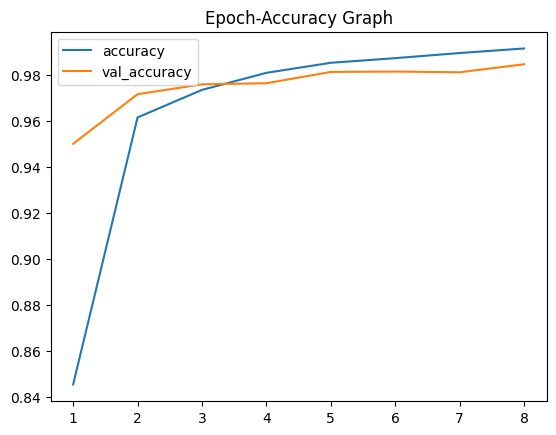

In [43]:
plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(history.epoch) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.epoch) + 1), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

### Test X_test on this model ###

In [44]:
y_pred_prob = model.predict(X_test)

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [45]:
y_pred_1_classes = np.argmax(y_pred_prob, axis=1)

In [47]:
accuracy_score(y_pred_1_classes, y_test)


0.9864761904761905

###  Result- 98% of Accuracy is obtained which is far more greater then the KNN model

- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://www.kaggle.com/code/yanlukianchik/cnn-digit-98-65?scriptVersionId=153738010
